### Importación de datos



In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Importamos la biblioteca necesaria para insertar gráficos
import matplotlib.pyplot as plt

In [3]:
#Sumamos la facturación por tienda:
factura_1 = tienda["Precio"].sum()
factura_2 = tienda2["Precio"].sum()
factura_3 = tienda3["Precio"].sum()
factura_4 = tienda4["Precio"].sum()
print(f"La tienda 1 facturó: ${factura_1}")
print(f"La tienda 2 facturó: ${factura_2}")
print(f"La tienda 3 facturó: ${factura_3}")
print(f"La tienda 4 facturó: ${factura_4}")

La tienda 1 facturó: $1150880400.0
La tienda 2 facturó: $1116343500.0
La tienda 3 facturó: $1098019600.0
La tienda 4 facturó: $1038375700.0


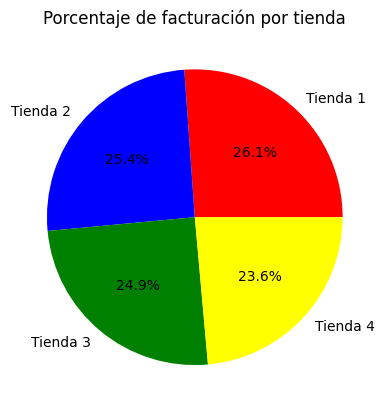

La tienda con menor facturación es la Tienda 4 con $1038375700.0
La tienda con mayor facturación es la Tienda 1 con $1150880400.0


In [4]:
#Comenzamos los códigos para nuestro gráfico
facturacion_total = [factura_1, factura_2, factura_3, factura_4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
colores=["Red","blue", "green", "yellow"]

#Utilizamos un gráfico de barras simple, con el título, etiquetas y colores
plt.pie(facturacion_total, labels=tiendas, colors=colores, autopct="%1.1f%%")
plt.title("Porcentaje de facturación por tienda")
plt.show()

#Mostramos al usuario su mínimo y su máximo para el análisis
minimo = min(facturacion_total)
maximo = max(facturacion_total)
tienda_min = facturacion_total.index(minimo)
tienda_max = facturacion_total.index(maximo)
print(f"La tienda con menor facturación es la {tiendas[tienda_min]} con ${minimo}")
print(f"La tienda con mayor facturación es la {tiendas[tienda_max]} con ${maximo}")


# 2. Ventas por categoría

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                

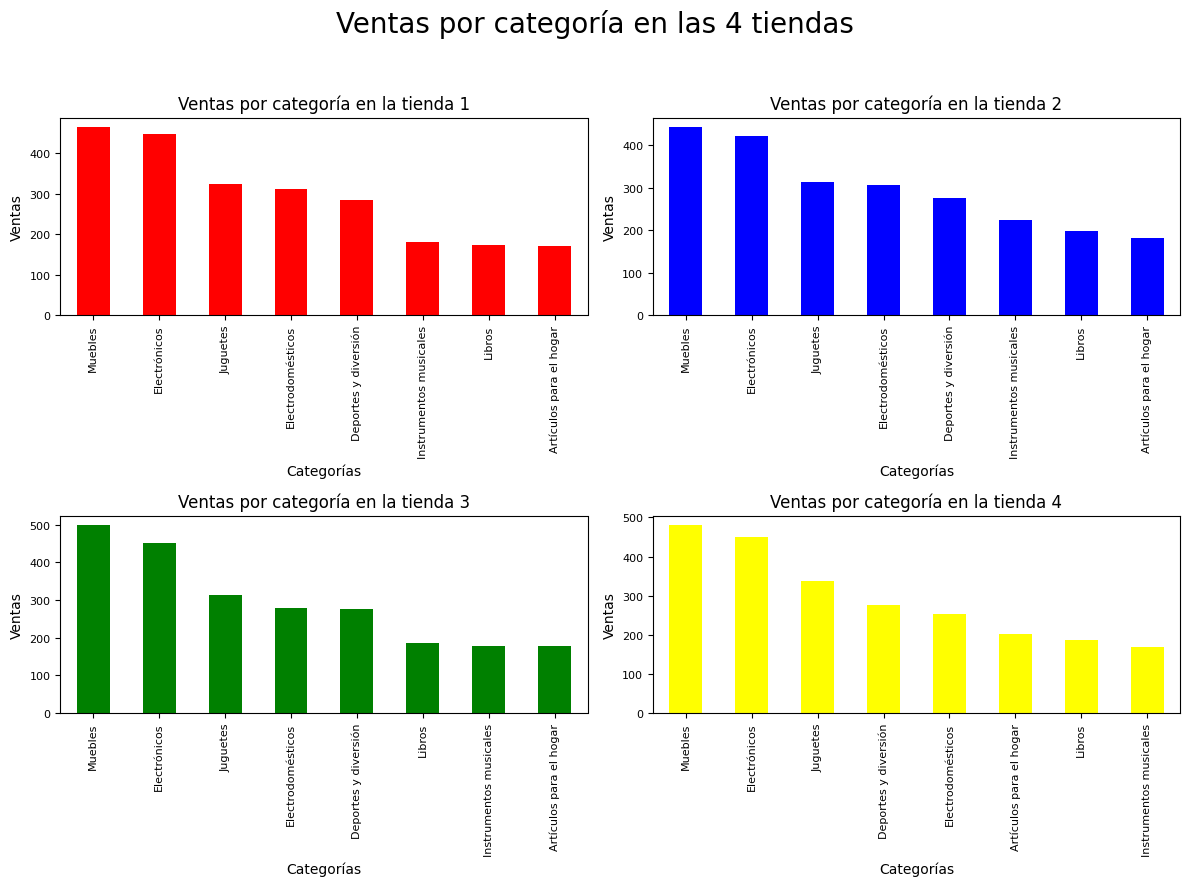

In [5]:
#Comenzamos el análisis por categoría
ventas_c_T1 = tienda["Categoría del Producto"].value_counts()
ventas_c_T2 = tienda2["Categoría del Producto"].value_counts()
ventas_c_T3 = tienda3["Categoría del Producto"].value_counts()
ventas_c_T4 = tienda4["Categoría del Producto"].value_counts()

#Ordenamos de mayor a menor cada tienda
sort_ventas_T1 = ventas_c_T1.sort_values(ascending=False)
sort_ventas_T2 = ventas_c_T2.sort_values(ascending=False)
sort_ventas_T3 = ventas_c_T3.sort_values(ascending=False)
sort_ventas_T4 = ventas_c_T4.sort_values(ascending=False)
print(sort_ventas_T1)
print(sort_ventas_T2)
print(sort_ventas_T3)
print(sort_ventas_T4)

#Insertamos gráficos para las categorías
#Iniciamos con una figura en la que veamos los 4 gráficos en formato
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Ventas por categoría en las 4 tiendas", fontsize=20)

#Gráfico para la tienda 1
sort_ventas_T1.plot(kind="bar",ax=axs[0,0], title="Ventas por categoría en la tienda 1", color="Red",fontsize=8)
axs[0,0].set_xlabel("Categorías")
axs[0,0].set_ylabel("Ventas")

#Grafico para la tienda 2
sort_ventas_T2.plot(kind="bar",ax=axs[0,1], title="Ventas por categoría en la tienda 2", color="Blue",fontsize=8)
axs[0,1].set_xlabel("Categorías")
axs[0,1].set_ylabel("Ventas")

#Grafico para la tienda 3
sort_ventas_T3.plot(kind="bar",ax=axs[1,0], title="Ventas por categoría en la tienda 3", color="Green",fontsize=8)
axs[1,0].set_xlabel("Categorías")
axs[1,0].set_ylabel("Ventas")

#Grafico para la tienda 4
sort_ventas_T4.plot(kind="bar",ax=axs[1,1], title="Ventas por categoría en la tienda 4", color="Yellow",fontsize=8)
axs[1,1].set_xlabel("Categorías")
axs[1,1].set_ylabel("Ventas")

#Evitamos que los gráficos se "encimen"
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


# 3. Calificación promedio de la tienda


In [6]:
#Obtenemos los promedios por tienda
promedio_T1 = tienda["Calificación"].mean().round(2)
promedio_T2 = tienda2["Calificación"].mean().round(2)
promedio_T3 = tienda3["Calificación"].mean().round(2)
promedio_T4 = tienda4["Calificación"].mean().round(2)
promedios={"Tienda 1":promedio_T1,"Tienda 2":promedio_T2,"Tienda 3":promedio_T3,"Tienda 4":promedio_T4}

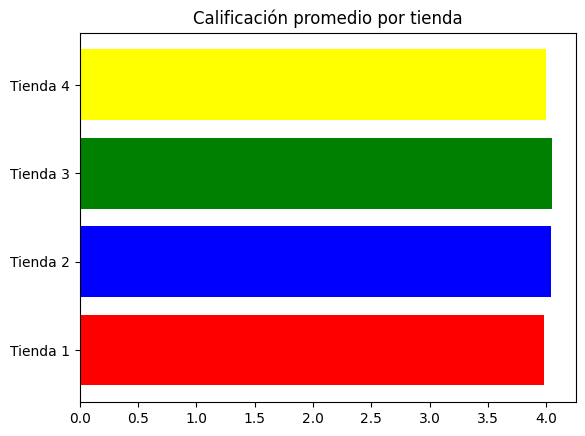

Clasificando las tiendas por su calificación promedio tenemos:
Tienda 3: 4.05
Tienda 2: 4.04
Tienda 4: 4.0
Tienda 1: 3.98


In [7]:
#Imprimimos un gráfico para visualizar los promedios:
grafico_promedios=plt.barh(list(promedios.keys()),list(promedios.values()),color=colores)
plt.title("Calificación promedio por tienda")
colores=["Red","blue", "green", "yellow"]
plt.show()
promedio_ordenado = sorted(promedios.items(),key=lambda x:x[1], reverse=True)
print("Clasificando las tiendas por su calificación promedio tenemos:")
for tienda, promedio in promedio_ordenado:
  print(f"{tienda}: {promedio}")

# 4. Productos más y menos vendidos

In [19]:
#Ahora hagamos el análisis para los productos más y menos vendidos
#Usaremos una estructura similar a las categorías
productos_T1 = tienda['Producto'].value_counts()
productos_T2 = tienda2['Producto'].value_counts()
productos_T3 = tienda3['Producto'].value_counts()
productos_T4 = tienda4['Producto'].value_counts()
#Ordenamos los productos por los más vendidos
sort_ventas_T1 = productos_T1.sort_values(ascending=False)
sort_ventas_T2 = productos_T2.sort_values(ascending=False)
sort_ventas_T3 = productos_T3.sort_values(ascending=False)
sort_ventas_T4 = productos_T4.sort_values(ascending=False)
#Mostramos los productos más y menos vendidos por tienda con ayuda de pandas
productos_vt = {
    'Tienda 1': sort_ventas_T1,
    'Tienda 2': sort_ventas_T2,
    'Tienda 3': sort_ventas_T3,
    'Tienda 4': sort_ventas_T4
}

# Create a DataFrame from the dictionary of Series
df = pd.DataFrame(productos_vt)

# Find the most and least sold products and their quantities
max_y_min = pd.DataFrame({
    'Producto más vendido': df.idxmax(),
    'Cantidad del más vendido': df.max(),
    'Producto menos vendido': df.idxmin(),
    'Cantidad del menos vendido': df.min()
})

display(df.head(10))
display(max_y_min.head(10))

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,49,45,47,39
Armario,60,54,49,34
Asistente virtual,40,38,39,50
Auriculares,50,37,43,44
Auriculares con micrófono,33,44,39,42
Balón de baloncesto,55,42,50,50
Balón de voleibol,42,46,48,48
Batería,53,61,41,48
Bicicleta,54,45,52,45


,Producto más vendido,Cantidad del más vendido,Producto menos vendido,Cantidad del menos vendido
Tienda 1,Armario,60,Auriculares con micrófono,33
Tienda 2,Iniciando en programación,65,Juego de mesa,32
Tienda 3,Kit de bancas,57,Bloques de construcción,35
Tienda 4,Cama box,62,Guitarra eléctrica,33


# 5. Envío promedio por tienda

El promedio de envío de la tienda 1 es: $26018.61
El promedio de envío de la tienda 2 es: $25216.24
El promedio de envío de la tienda 3 es: $24805.68
El promedio de envío de la tienda 4 es: $23459.46
De forma gráfica tenemos que:


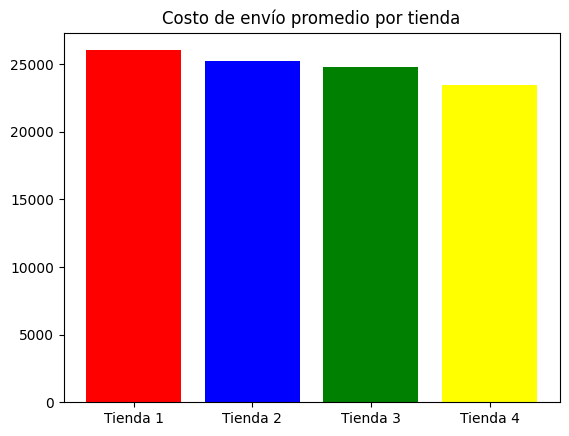

In [23]:
#Obtenemos los promedios por envío
promedio_e_T1 = tienda["Costo de envío"].mean().round(2)
promedio_e_T2 = tienda2["Costo de envío"].mean().round(2)
promedio_e_T3 = tienda3["Costo de envío"].mean().round(2)
promedio_e_T4 = tienda4["Costo de envío"].mean().round(2)
promedio_envio=[promedio_e_T1, promedio_e_T2, promedio_e_T3, promedio_e_T4]
tiendas=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

print(f"El promedio de envío de la tienda 1 es: ${promedio__e_T1}")
print(f"El promedio de envío de la tienda 2 es: ${promedio_e_T2}")
print(f"El promedio de envío de la tienda 3 es: ${promedio_e_T3}")
print(f"El promedio de envío de la tienda 4 es: ${promedio_e_T4}")
print("De forma gráfica tenemos que:")

#Obtenemos el gráfico con los promedios:
plt.bar(tiendas,promedio_envio,color=colores)
plt.title("Costo de envío promedio por tienda")
plt.show()
